AVCAD - Exercise 5

Students: Maria Dolgaya (28168) and Mariana Coelho (25605)

In this exercise you will use again the dfset in EFIplus_medit.zip to perform some hypothesis testing
1. Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.
2. Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test using both standardized and non-standardized values. Please state which is/are the null hypothesis of your test(s).
3. Test whether there are diferences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).
4. Which potential problems did you identified in the df that could limit the conclusions derived from the performed tests?

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats as stm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dfset
df = pd.read_csv('C:\\Users\\acris\\greends-avcad-2024\\examples\\EFIplus_medit.zip',compression='zip', sep=";")

In [2]:
# Load the dfset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

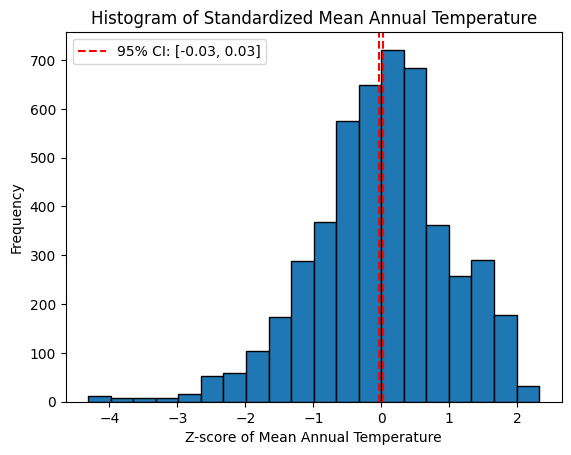

In [3]:
# 1. Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.
temp_ann_mean = df['temp_ann'].mean()
temp_ann_std = df['temp_ann'].std()
temp_ann_zscore = (df['temp_ann'] - temp_ann_mean) / temp_ann_std

# Calculate new mean and standard deviation
new_mean = temp_ann_zscore.mean()
new_sd = temp_ann_zscore.std()

# Calculate 95% confidence interval
n = len(temp_ann_zscore)
margin_of_error = 1.96 * (new_sd / np.sqrt(n))  # 1.96 is the z-score for 95% confidence interval
ci_lower = new_mean - margin_of_error
ci_upper = new_mean + margin_of_error

# Plot histogram
plt.hist(temp_ann_zscore, bins=20, edgecolor='black')
plt.xlabel('Z-score of Mean Annual Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Mean Annual Temperature')
plt.axvline(ci_lower, color='red', linestyle='--', label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
plt.axvline(ci_upper, color='red', linestyle='--')
plt.legend()
plt.show()

In [7]:
# 2. Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test using both standardized and non-standardized values. Please state which is/are the null hypothesis of your test(s).
presence = df[df['Salmo trutta fario'] == 1]
absence = df[df['Salmo trutta fario'] == 0]
presence_temp = presence['temp_ann'].dropna()
absence_temp = absence['temp_ann'].dropna()

# H0: The means of "Mean Annual Temperature" between presence and absence sites of Brown Trout are equal.

# t-test - tests the null hypothesis that sample 1 and 2 are derived from populations with the same mean
stat, p = sts.ttest_ind(presence_temp,absence_temp)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')



Statistics=-43.454, p=0.000
reject H0 with an error probability <0.05)


In [34]:
# Mann-Whitney U Test (or Wilcoxon rank sum test) - two-tailed test

stat, p = sts.mannwhitneyu(presence_temp,absence_temp, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=1027812.500, p=0.000
reject H0 with an error probability <0.05)


In [10]:
# 3. Test whether there are diferences in the mean elevation in the upstream catchment 
# (Elevation_mean_catch) among the eight most sampled catchments. 
# For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).

# H0: There are no differences in the mean elevation among the eight most sampled catchments.

counts = df['Catchment_name'].value_counts()
top_8 = counts.nlargest(8).index
top_8_df = df[df['Catchment_name'].isin(top_8)].dropna()
elevation = [top_8_df[top_8_df['Catchment_name'] == catchment]['Elevation_mean_catch'] for catchment in top_8]

# ANOVA test
stat, p = sts.f_oneway(*elevation)
print('F-statistics=%.3f, p=%.6f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Fail to reject H0. Rejecting H0 has an error probability > 0.05')
else:
    print('Reject H0 with an error probability < 0.05')

F-statistics=166.490, p=0.000000
Reject H0 with an error probability < 0.05


4. Potential problems identified in the df
- Missing values
- Outliers
- Sample size
- df quality